# Lab2: Linear Regression & Data Visualization with Python
# 6/17/2021
# Shawn Meng

## Question1: Read in train_2017.csv and properties_2017.csv

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
train_2017 = pd.read_csv('train_2017.csv')
properties_2017 = pd.read_csv('properties_2017.csv')

C:\Users\xianw_000\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
train_2017.head()


,parcelid,logerror,transactiondate
0,14297519,0.02559,2017-01-01
1,17052889,0.05562,2017-01-01
2,14186244,0.00538,2017-01-01
3,12177905,-0.10341,2017-01-01
4,10887214,0.00694,2017-01-01


In [14]:
properties_2017.head()


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,nan,nan,nan,0.00000,0.00000,nan,nan,nan,nan,...,nan,NaN,nan,9.00000,2016.00000,9.00000,nan,NaN,nan,nan
1,10759547,nan,nan,nan,0.00000,0.00000,nan,nan,nan,nan,...,nan,NaN,nan,27516.00000,2015.00000,27516.00000,nan,NaN,nan,nan
2,10843547,nan,nan,nan,0.00000,0.00000,5.00000,nan,nan,nan,...,1.00000,NaN,660680.00000,1434941.00000,2016.00000,774261.00000,20800.37000,NaN,nan,nan
3,10859147,nan,nan,nan,0.00000,0.00000,3.00000,6.00000,nan,nan,...,1.00000,NaN,580059.00000,1174475.00000,2016.00000,594416.00000,14557.57000,NaN,nan,nan
4,10879947,nan,nan,nan,0.00000,0.00000,4.00000,nan,nan,nan,...,1.00000,NaN,196751.00000,440101.00000,2016.00000,243350.00000,5725.17000,NaN,nan,nan


## Question2: Merge these two datasets using *parcelid* as the key. Use inner join. Report the number of rows and columns in the merged dataset. Note that this will drop some rows, but for the purposes of this lab, we're only interested in those records where we have a match between these two datasets.

In [19]:
df = pd.merge(train_2017, properties_2017, how = 'inner', on = train_2017.columns[0])

In [20]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.02559,2017-01-01,nan,nan,nan,3.50000,4.00000,nan,nan,...,nan,NaN,485713.00000,1023282.00000,2016.00000,537569.00000,11013.72000,NaN,nan,60590630072012.00000
1,17052889,0.05562,2017-01-01,nan,nan,nan,1.00000,2.00000,nan,nan,...,1.00000,NaN,88000.00000,464000.00000,2016.00000,376000.00000,5672.48000,NaN,nan,61110010023006.00000
2,14186244,0.00538,2017-01-01,nan,nan,nan,2.00000,3.00000,nan,nan,...,1.00000,NaN,85289.00000,564778.00000,2016.00000,479489.00000,6488.30000,NaN,nan,60590218022012.00000
3,12177905,-0.10341,2017-01-01,nan,nan,nan,3.00000,4.00000,nan,8.00000,...,nan,NaN,108918.00000,145143.00000,2016.00000,36225.00000,1777.51000,NaN,nan,60373001001006.00000
4,10887214,0.00694,2017-01-01,1.00000,nan,nan,3.00000,3.00000,nan,8.00000,...,nan,NaN,73681.00000,119407.00000,2016.00000,45726.00000,1533.89000,NaN,nan,60371236012000.00000


In [21]:
df.shape

(77613, 60)

The merged dataset has 77613 rows and 60 columns

## Question3: When building models, it's a good idea to split your data into train and validation so that you can see how well the model performs on data it has not seen before. Use 70% of the data for training and 30% for validation.

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
train_set, val_set = train_test_split(df, train_size = 0.7, random_state = 9660)

In [24]:
train_set.shape

(54329, 60)

In [25]:
val_set.shape

(23284, 60)

## Question 4: In this lab, you will be using the *logerror* variable as the dependent variable. i.e. you will be trying to predict this value from other independent variables. This variable is defined as the logarithm of the difference between Zillow's estimate for a home price vs. the actual selling price for the home. In other words, you think of it as a measure of the error in Zillow's home price estimate. It's a good idea to explore your dataset before attempting modeling(particularly the label). In this step, start with getting the descriptive statistics of *logerror* in the training set. What is its mean, median, range, and standard deviation.

In [26]:
train_set.logerror.describe()

count   54329.00000
mean        0.01717
std         0.16965
min        -4.65542
25%        -0.02440
50%         0.00672
75%         0.03934
max         5.26300
Name: logerror, dtype: float64

For **logerror** in the training set,
the mean is 0.01717
the median is 0.00672
the range is -4.65542 to 5.26300
the standard deviation is 0.16965

## Question 5: Generate a histogram for each variable in the dataset.

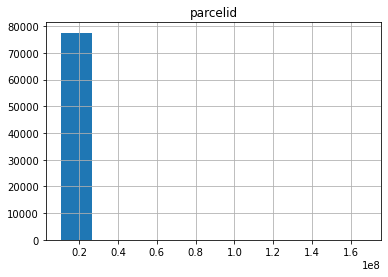

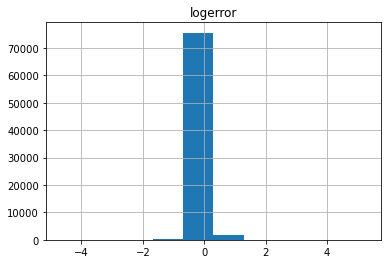

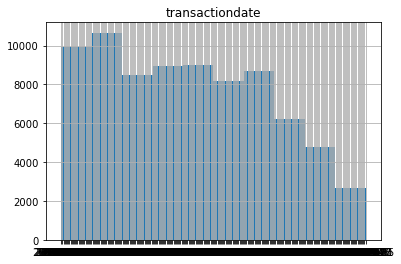

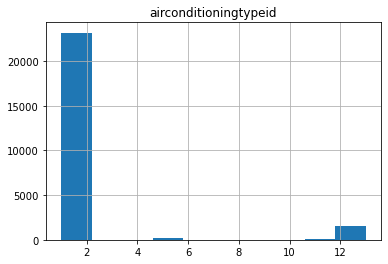

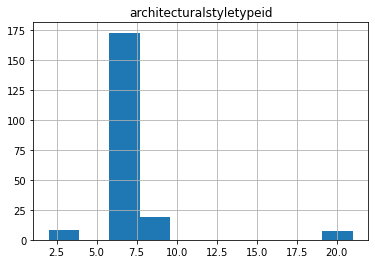

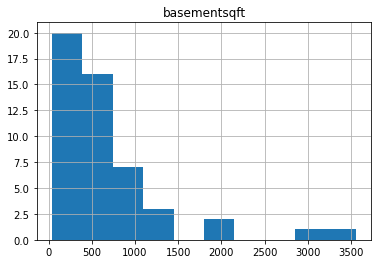

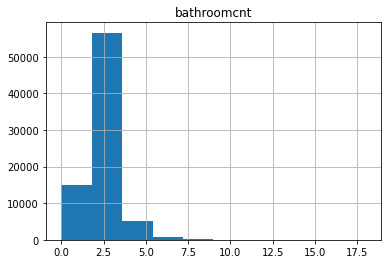

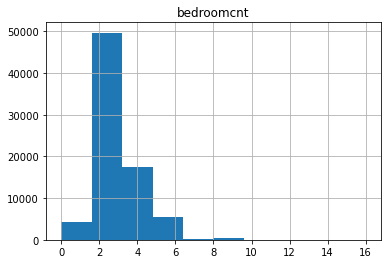

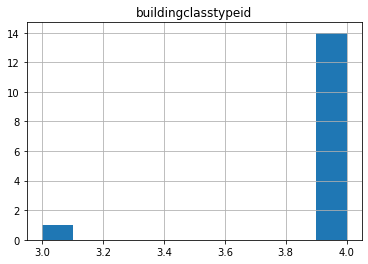

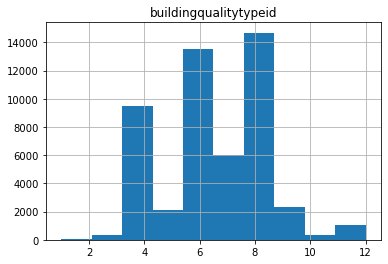

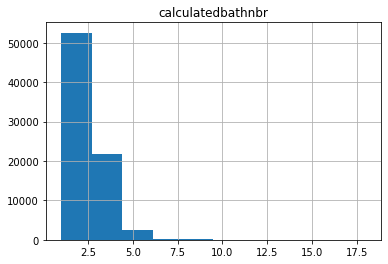

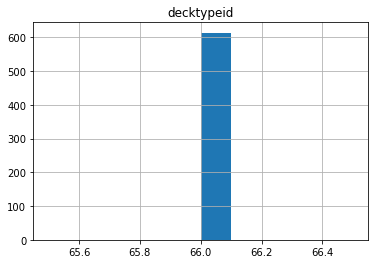

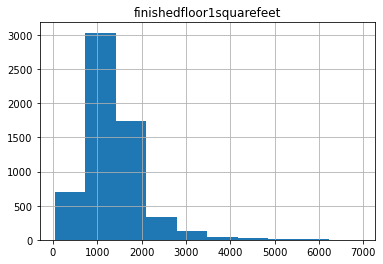

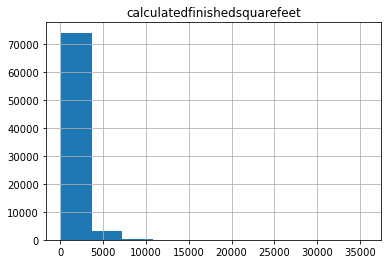

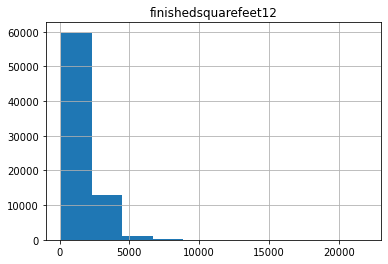

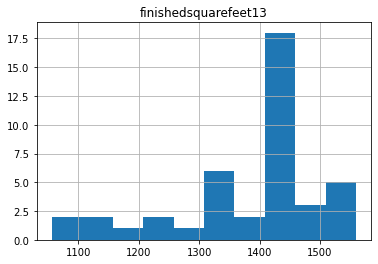

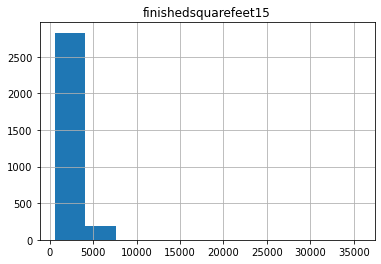

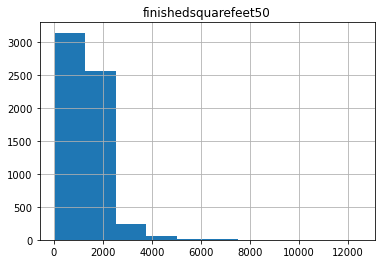

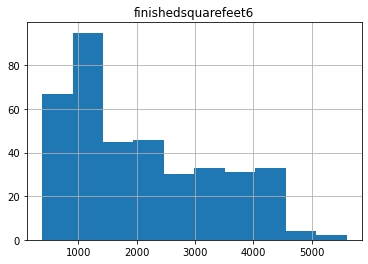

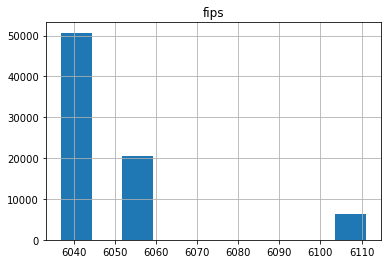

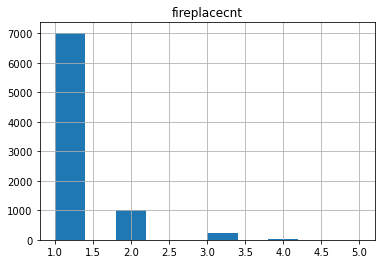

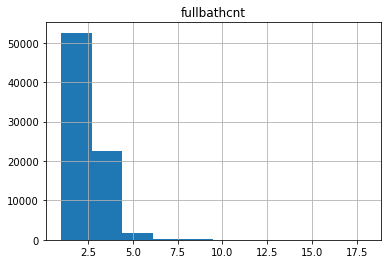

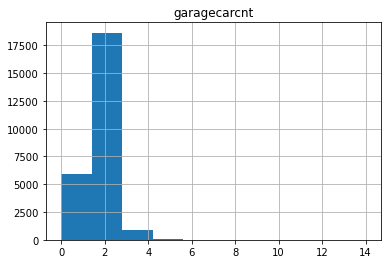

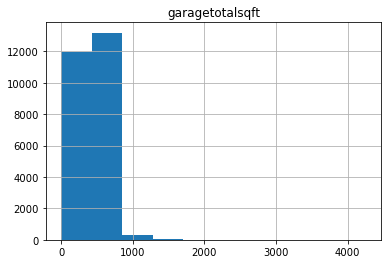

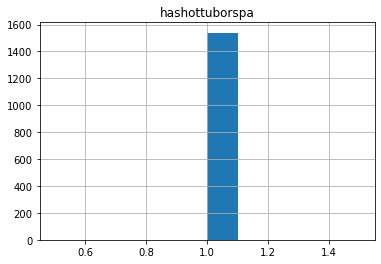

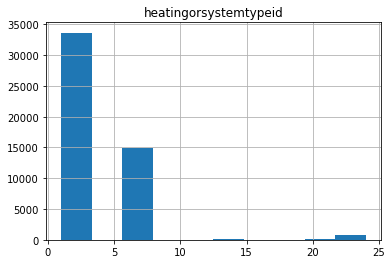

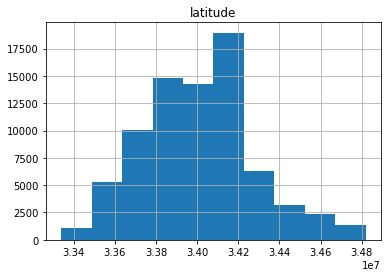

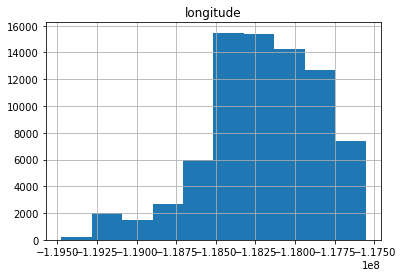

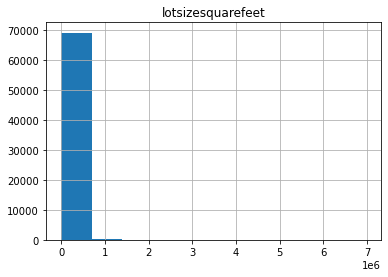

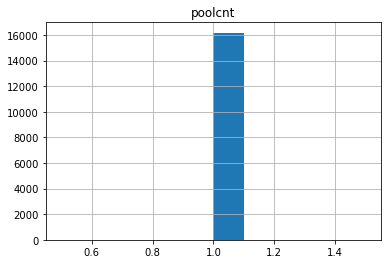

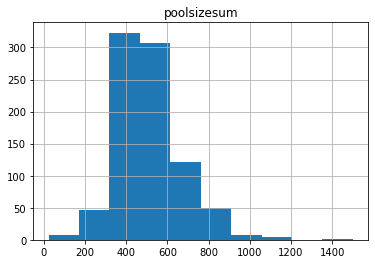

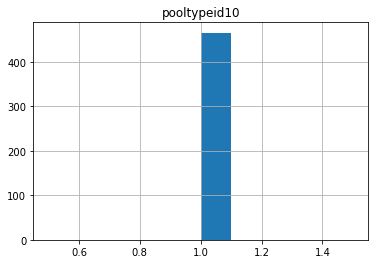

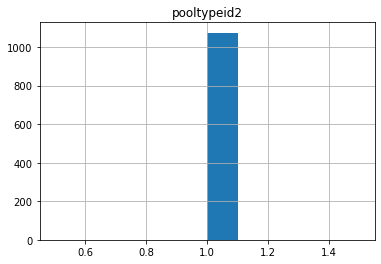

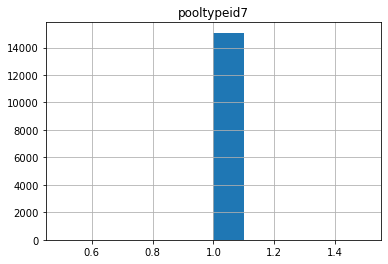

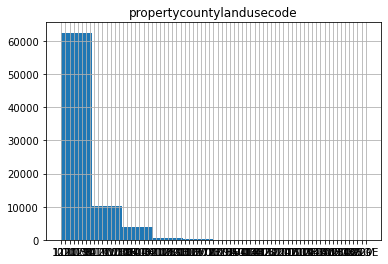

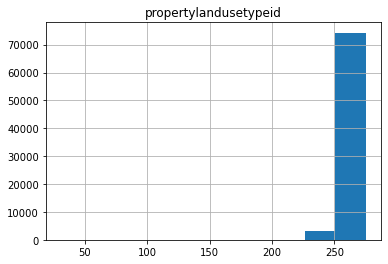

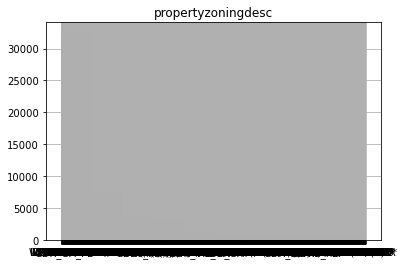

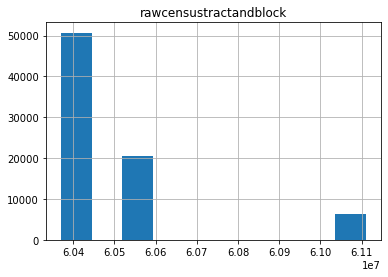

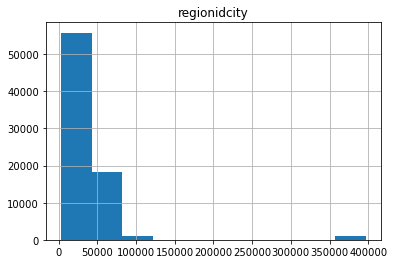

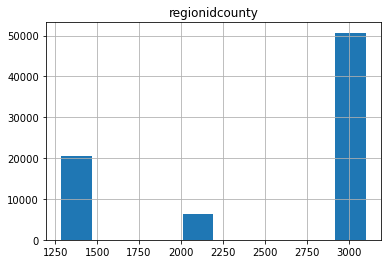

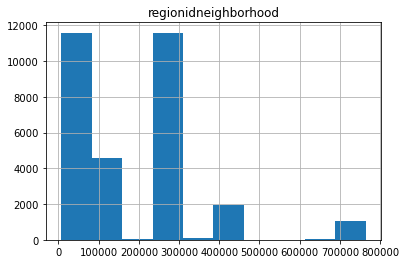

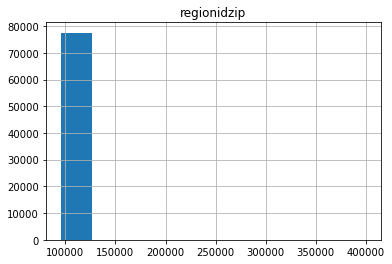

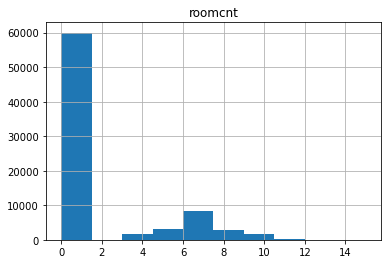

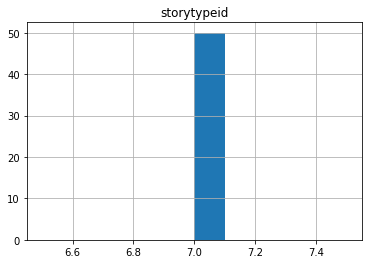

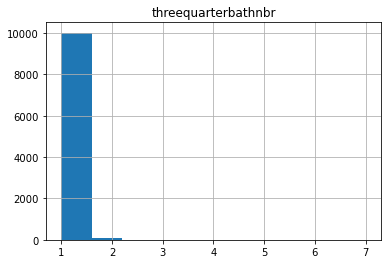

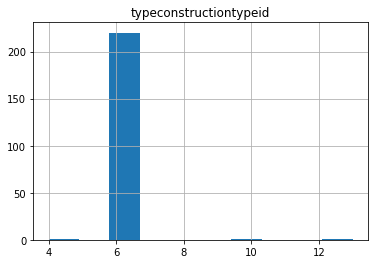

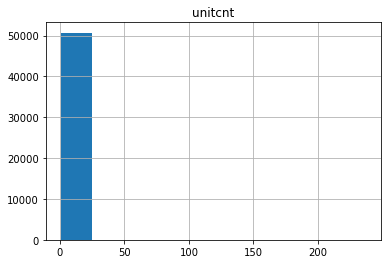

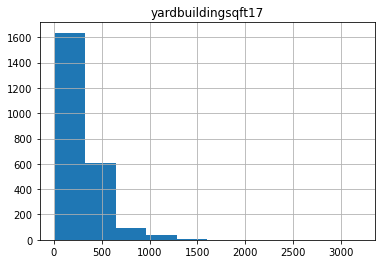

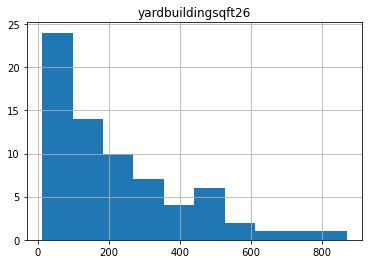

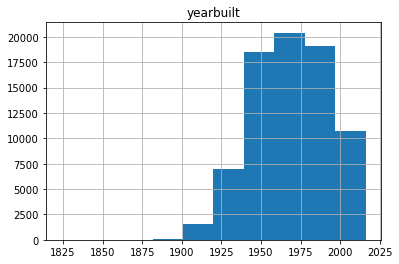

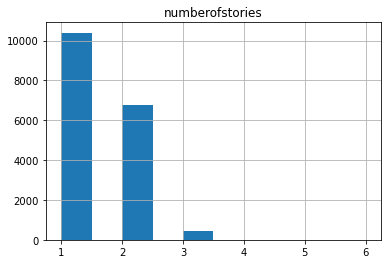

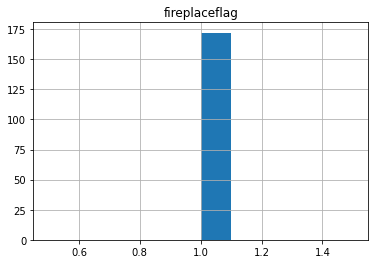

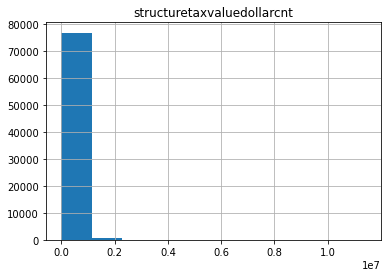

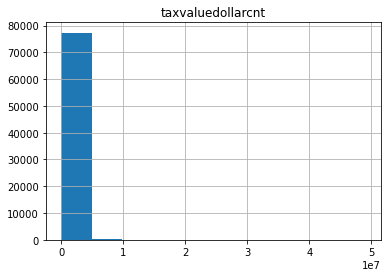

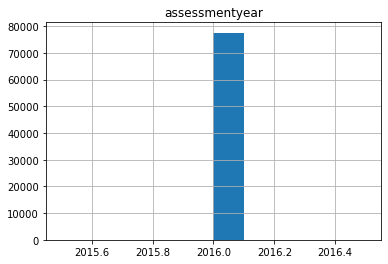

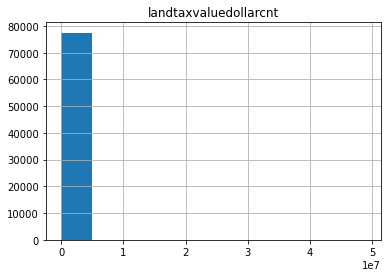

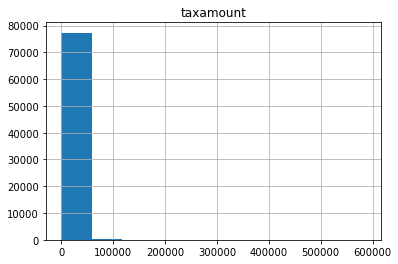

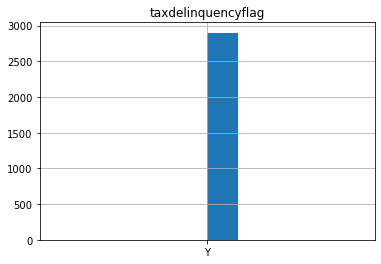

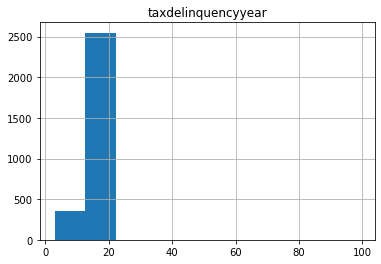

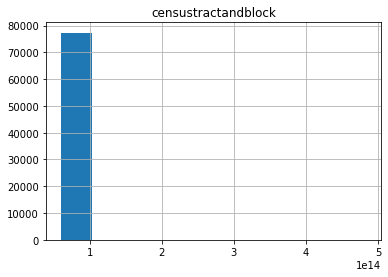

In [29]:
for i in df.columns:
    df[i].hist()
    plt.title(i)
    plt.show()

## Question 6: Filter the variables in the dataset to a list of ones missing less than 20% of their values in the training set. For this problem, do not count discrete variables, like *poolcnt* as missing. Instead, impute the missing values as 0. You may need to read throught the data dictionary for reference. Return this list of variables.

In [40]:
df2 = train_set.isna().any()

In [179]:
df2

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                      True
bedroomcnt                       True
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude    

It looks like a lot of the variables(57) are having missing values.

In [45]:
train_set.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,54329.00000,54329.00000,17479.00000,148.00000,32.00000,54306.00000,54306.00000,11.00000,34954.00000,53881.00000,...,41.00000,54131.00000,12302.00000,54225.00000,54306.00000,54306.00000,54306.00000,54303.00000,2066.00000,54133.00000
mean,13004515.16540,0.01717,1.80931,6.93919,704.68750,2.29430,3.04802,4.00000,6.53253,2.31184,...,236.07317,1968.53566,1.43375,188323.44592,489787.22940,2016.00000,301744.67692,5991.46863,14.07841,60491087694496.52344
std,3526210.45758,0.16965,2.96058,1.61298,799.56893,0.99365,1.13833,0.00000,1.72158,0.97689,...,200.27511,23.77220,0.54513,225481.08485,666237.25360,0.00000,512614.14720,7774.10994,1.49532,206140593325.81964
min,10711877.00000,-4.65542,1.00000,2.00000,38.00000,0.00000,0.00000,4.00000,1.00000,1.00000,...,21.00000,1878.00000,1.00000,129.00000,3254.00000,2016.00000,161.00000,19.92000,3.00000,60371011101000.00000
25%,11535873.00000,-0.02440,1.00000,7.00000,273.00000,2.00000,2.00000,4.00000,6.00000,2.00000,...,71.00000,1953.00000,1.00000,84025.00000,206125.75000,2016.00000,84887.25000,2707.47000,14.00000,60373106011001.00000
50%,12524662.00000,0.00672,1.00000,7.00000,513.50000,2.00000,3.00000,4.00000,6.00000,2.00000,...,174.00000,1970.00000,1.00000,136192.00000,358687.00000,2016.00000,203143.50000,4446.46000,15.00000,60376030013000.00000
75%,14210340.00000,0.03934,1.00000,7.00000,789.50000,3.00000,4.00000,4.00000,8.00000,3.00000,...,360.00000,1987.00000,2.00000,218057.00000,567257.75000,2016.00000,365490.00000,6910.23000,15.00000,60590423241020.00000
max,167688532.00000,5.26300,13.00000,21.00000,3560.00000,18.00000,14.00000,4.00000,12.00000,18.00000,...,868.00000,2016.00000,6.00000,11421790.00000,49061236.00000,2016.00000,48952198.00000,586639.30000,15.00000,61110091001017.00000


In [82]:
train_set.isna().sum()

parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           36850
architecturalstyletypeid        54181
basementsqft                    54297
bathroomcnt                        23
bedroomcnt                         23
buildingclasstypeid             54318
buildingqualitytypeid           19375
calculatedbathnbr                 448
decktypeid                      53901
finishedfloor1squarefeet        50105
calculatedfinishedsquarefeet      152
finishedsquarefeet12             2591
finishedsquarefeet13            54301
finishedsquarefeet15            52175
finishedsquarefeet50            50105
finishedsquarefeet6             54072
fips                               23
fireplacecnt                    48513
fullbathcnt                       448
garagecarcnt                    36533
garagetotalsqft                 36533
hashottuborspa                  53237
heatingorsystemtypeid           19617
latitude    

We need to identify the discrete variables of the training dataset. We can do this by looking at summary statistics and the codebook.

In [101]:
# to find number of unique values of each variable
unique_vals =[]
for i in train_set.columns:
    unique_vals.append(len(train_set[i].unique()))

In [94]:
df3 = pd.DataFrame(list(zip(train_set.columns,unique_vals)), columns=['Feature', 'unique_counts'])
data_dictionary = pd.read_excel('data_dictionary.xlsx', header =0)

In [95]:
data_dictionary.Feature=data_dictionary.Feature.str.strip("''")
#clean up the str of Feature for joining

Here I created a new dataframe df3 for the unique values of the variable for the training dataset. The purpose of this dataframe df3 is to quickly identify possible discrete variable as it's tedious to go through the code book first.
I think there is a good chance the variable is discrete if the unique values are less.

In [97]:
df4 = pd.merge(df3, data_dictionary, how = 'left', on = "Feature")
df4.style

,Feature,unique_counts,Description
0,parcelid,54231,Unique identifier for parcels (lots)
1,logerror,54038,nan
2,transactiondate,258,nan
3,airconditioningtypeid,6,Type of cooling system present in the home (if any)
4,architecturalstyletypeid,6,"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
5,basementsqft,30,Finished living area below or partially below ground level
6,bathroomcnt,22,Number of bathrooms in home including fractional bathrooms
7,bedroomcnt,16,Number of bedrooms in home
8,buildingclasstypeid,2,"The building framing type (steel frame, wood frame, concrete/brick)"
9,buildingqualitytypeid,13,Overall assessment of condition of the building from best (lowest) to worst (highest)


In [105]:
possible_discrete = df4[df4.unique_counts<30]#set the threshood for filtering discrete variable as of 30 
possible_discrete.style

,Feature,unique_counts,Description
3,airconditioningtypeid,6,Type of cooling system present in the home (if any)
4,architecturalstyletypeid,6,"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
6,bathroomcnt,22,Number of bathrooms in home including fractional bathrooms
7,bedroomcnt,16,Number of bedrooms in home
8,buildingclasstypeid,2,"The building framing type (steel frame, wood frame, concrete/brick)"
9,buildingqualitytypeid,13,Overall assessment of condition of the building from best (lowest) to worst (highest)
10,calculatedbathnbr,21,Number of bathrooms in home including fractional bathroom
11,decktypeid,2,Type of deck (if any) present on parcel
15,finishedsquarefeet13,12,Perimeter living area
19,fips,4,Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details


one obervation here is that the discrete variables often has "cnt" or "id" in the name. However, I think we need cross reference with the discription to furthur identify variables that are not suitable to impute missing values as 0.

In [107]:
#munually identify the the variable not suitable to impute as 0
no_impute = ['fips', 'finishedsquarefeet13','propertylandusetypeid','regionidcounty','assessmentyear','taxdelinquencyyear']

In [108]:
val_impute = []
for i in possible_discrete.Feature:
    if i not in no_impute:
        val_impute.append(i)

now it is ready to impute 0 for some missing values

In [122]:
for i in train_set.columns:
    if i in val_impute:
        train_set[i] = train_set[i].fillna(0)

<ipython-input-122-9c1d89672fdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[i] = train_set[i].fillna(0)


In [154]:
train_set.isna().any()# double check if the impute 0 succussful.

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid           False
architecturalstyletypeid        False
basementsqft                     True
bathroomcnt                     False
bedroomcnt                      False
buildingclasstypeid             False
buildingqualitytypeid           False
calculatedbathnbr               False
decktypeid                      False
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                    False
fullbathcnt                     False
garagecarcnt                    False
garagetotalsqft                  True
hashottuborspa                  False
heatingorsystemtypeid           False
latitude    

In [229]:
na_less_20 = train_set.columns[train_set.isna().sum()/train_set.shape[0]<0.2].tolist()

In [230]:
print(na_less_20)

['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid', 'architecturalstyletypeid', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'hashottuborspa', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yearbuilt', 'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag', 'censustractandblock']


`na_less_20` is the list of the variables with less 20% of the missing values in the training set

## Question 7: Based on the list of variables above, select 5 predictors of your choice(i.e. these 5 should not include the label, *logerror*). For these 5 variables, impute the missing values in the training set using the median of the each column's value. For the validation set, impute the missing values for these variables - also using the median based off the training set.

In [141]:
select_val = ['taxamount','unitcnt','yearbuilt','lotsizesquarefeet','bedroomcnt']

In [167]:
train_set_1 = train_set[select_val]
val_set_1 = val_set[select_val]
#subsetting training set and validation set down to the five selected predictors

As requested by the question, we need to identify the discrete variables. Then impute the missing values as 0 for discrete variables.

In [176]:
impute_dict = dict(train_set_1.median(axis=0))
#create a dictionary for missing value impute
impute_dict

{'taxamount': 4446.46,
 'unitcnt': 1.0,
 'yearbuilt': 1970.0,
 'lotsizesquarefeet': 7202.0,
 'bedroomcnt': 3.0}

In [187]:
for i in train_set_1:
    train_set_1[i] = train_set_1[i].fillna(impute_dict[i])
    

<ipython-input-187-d70ac72a2198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_1[i] = train_set_1[i].fillna(impute_dict[i])


In [188]:
train_set_1.isna().sum()

taxamount            0
unitcnt              0
yearbuilt            0
lotsizesquarefeet    0
bedroomcnt           0
dtype: int64

In [185]:
#same operation for validation set
for i in val_set_1:
    val_set_1[i] = val_set_1[i].fillna(impute_dict[i])

<ipython-input-185-a4664585d391>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_1[i] = val_set_1[i].fillna(impute_dict[i])


In [189]:
val_set_1.isna().sum()

taxamount            0
unitcnt              0
yearbuilt            0
lotsizesquarefeet    0
bedroomcnt           0
dtype: int64

## Question8: Create a heatmap of the correlation matrix for these 5 variables. Are there any issues with correlation? how might this affect a linear regression model?

In [191]:
corr_matrix = train_set_1.corr()

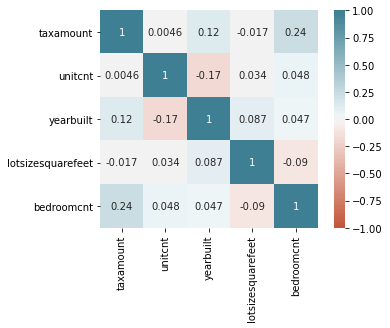

In [199]:
sns.heatmap(corr_matrix,center=0,vmax=1,vmin=-1,
            annot=True,
            cmap=sns.diverging_palette(20, 220, n=200),
            square = True)

There is moderate correlation between `bedroomcnt` and `taxamount`. There is negative correlation between `yearbuild` and `unitcnt`. But there is no strong correlation among these 5 variables. Strong corrlation among variables could nagatively impact the performance of the linear model. Luckily, we do not have this problem in these 5 variables.

## Question 9: Train a linear regression model using these 5 variables as predictors and *logerror* as the response variable on the training set. Report RMSE and MAE o the training and validation data. Second, train a baseline linear regression model using the median(or mean) of the logerror variable. compare the performance of the baseline vs. the model with the 5 variables. what else could you do to improve your model?

In [218]:
train_set_1['logerror']=train_set['logerror']
val_set_1['logerror']=val_set['logerror']

<ipython-input-218-68bf7568274a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_1['logerror']=train_set['logerror']
<ipython-input-218-68bf7568274a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set_1['logerror']=val_set['logerror']


In [208]:
linear_mdl = smf.ols(formula = "logerror~taxamount+unitcnt+yearbuilt+lotsizesquarefeet+bedroomcnt", data = train_set_1).fit()

In [212]:
linear_mdl.params

Intercept           0.62335
taxamount           0.14096
unitcnt             0.06190
yearbuilt           0.64551
lotsizesquarefeet   0.01297
bedroomcnt          0.00000
dtype: float64

In [213]:
linear_mdl.pvalues

Intercept           0.62335
taxamount           0.14096
unitcnt             0.06190
yearbuilt           0.64551
lotsizesquarefeet   0.01297
bedroomcnt          0.00000
dtype: float64

In [214]:
train_hat = linear_mdl.predict(train_set_1)
train_true = train_set_1.logerror

In [216]:
train_rmse = eval_measures.rmse(train_hat, train_true)
train_mae = eval_measures.meanabs(train_hat, train_true)
print("the RMSE for the training data is "+ str(train_rmse)+".\n"+
     "the MAE for the training data is "+ str(train_mae)+".\n")

the RMSE for the training data is 0.16953465471007803.
the MAE for the training data is 0.07080059690574898.



In [219]:
val_hat = linear_mdl.predict(val_set_1)
val_true = val_set_1.logerror

In [221]:
val_rmse = eval_measures.rmse(val_hat, val_true)
val_mae = eval_measures.meanabs(val_hat, val_true)
print("the RMSE for the validation data is "+ str(val_rmse)+".\n"+
     "the MAE for the validation data is "+ str(val_mae)+".\n")

the RMSE for the validation data is 0.17364239195270612.
the MAE for the validation data is 0.07083684260065023.



Second, use median to fit a baseline model.

In [222]:
logerror_median = train_set_1.logerror.median()

In [223]:
baseline_rmse = eval_measures.rmse(logerror_median, val_true)
baseline_mae = eval_measures.meanabs(logerror_median, val_true)
print("the RMSE for the baseline model is "+str(baseline_rmse)+".\n"+
      "the MAE for the baseline model is "+str(baseline_mae)+".\n")

the RMSE for the baseline model is 0.17397577831916358.
the MAE for the baseline model is 0.06982529320947317.



There is no significant improvement of the linear model with 5 variables compare with the baseline model using median.  
I select these 5 variables as predictors manually. Instead, we might be getting a better model by using lasso regression to chose the variables.